In [1]:
!pip install ConfigParser
!pip install wordcloud

In [2]:
import re
import pandas as pd
import os
import tweepy as tw
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

[twitter]
accesstoken=xxxx

accesstokensecret=xxxx

apikey=xxxxxx

apisecretkey=xxxxxx

googleapikey=xxxxxxx

In [3]:
import configparser
config = configparser.RawConfigParser()
config.read('./ML Project.txt')

print(config.sections());


['twitter']


In [4]:
accesstoken=config.get('twitter', 'accesstoken')
accesstokensecret=config.get('twitter', 'accesstokensecret')
apikey=config.get('twitter', 'apikey')
apisecretkey=config.get('twitter', 'apisecretkey')

In [5]:
auth = tw.OAuthHandler(apikey, apisecretkey)
auth.set_access_token(accesstoken, accesstokensecret)
api = tw.API(auth, wait_on_rate_limit=True)

In [71]:
search_words = "#tablighijamaat" or "tablighijamat" or "nizamuddin" or "markaz" or "TablighiJamaat"
date_since = "2020-03-19"

In [72]:
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(100)

In [39]:
tweets

In [73]:
tweet_details = [[ tweet.text,tweet.user.screen_name, tweet.user.location] for tweet in tweets]
#tweet_details

In [74]:
tweet_df = pd.DataFrame(data=tweet_details, columns=['text','user', "location"])

In [75]:
pd.set_option('max_colwidth', 800)

tweet_df.head(20)

,text,user,location
0,RT @BishtJanmey: @NewsNationTV #TablighiJamaat #YeKaisaHindustan we are with india and with u deepak sir♥️ https://t.co/Dp6Fp2NCDa,JaiMaha43013830,PKMKB
1,@SarojBa87368396 @HinduNatl @narendramodi Thanks to #TablighiJamaat \nAnd how can we forget #MigrantWorkers conspiracy too !!\n#COVID__19,neha_unny,
2,"@IndiaToday @PrabhashRinkoo Ask Self , WHY ? You know but you will Not Answer 🦠🤣🤪😂😎 #TablighiJamaat in 28-29 th… https://t.co/4z505VEuxJ",Proud_Patel,
3,RT @BishtJanmey: @NewsNationTV #TablighiJamaat #YeKaisaHindustan we are with india and with u deepak sir♥️,Vipulso52260888,
4,"RT @RaviTewariHindu: #Mewat is the birthplace of the #TablighiJamaat was founded in the 1920s by a preacher named Md Ilias,“The dominance o…",SainiPolitics,"New York, USA"
5,"#Mewat is the birthplace of the #TablighiJamaat was founded in the 1920s by a preacher named Md Ilias,“The dominanc… https://t.co/lU4t5CjjNZ",RaviTewariHindu,"Kolkata, India"
6,"@Aadeetya007 @priyaakulkarni2 @AshokShrivasta6 See the image. My purpose was to show Ashok sir, that if u are so mu… https://t.co/cbG3ZPX1T2",BvigilantCTzen,India
7,"@TheLallantop @adeshguptabjp @BJP4Delhi Hum ""Aah"" bhi kar de toh ho jate h badnaam \nWoh ""Qataal"" bhi kar de toh cha… https://t.co/ltYobta180",SyedF_official,"Kolkata, India"
8,RT @BishtJanmey: @NewsNationTV #TablighiJamaat #YeKaisaHindustan we are with india and with u deepak sir♥️ https://t.co/Dp6Fp2NCDa,Minayadav11,
9,RT @BishtJanmey: @NewsNationTV #TablighiJamaat #YeKaisaHindustan we are with india and with u deepak sir♥️ https://t.co/Dp6Fp2NCDa,Sushant96092005,


In [76]:
tweet_df.user.value_counts()

itherohitshaha     5
vinayak1992        2
AltabKh82955142    2
Samster3           2
karthik_vasan      2
                  ..
lallamitabh        1
JKviews            1
SaritaHooda_       1
RaviTewariHindu    1
lavanyadeepak      1
Name: user, Length: 89, dtype: int64

In [77]:
tweet_df.location.value_counts()

                                  34
India                              9
Thane, India                       5
Kolkata, India                     4
New Jersey, USA                    2
Bangalore                          2
New Delhi, India                   2
Delhi                              2
New York, USA                      1
chennai                            1
Mumbai                             1
उत्तर प्रदेश..                     1
Dehradun, India                    1
हिन्दुस्तान                        1
Hyderabad India                    1
New Delhi /Araria                  1
Cyberworld                         1
🇮🇳 🇺🇸                              1
Springfield                        1
PKMKB                              1
Prayagraj, भारत                    1
Noida, India                       1
Mumbai, India                      1
Colourful Country of the World     1
Greater Noida, India               1
Ahmadabad City, India              1
Delhi, India                       1
Q

In [45]:
tweet_df.dtypes

text        object
user        object
location    object
dtype: object

In [78]:
import re
def clean_tweets(text):
    text = re.sub("RT @[\w]*:","",text)
    text = re.sub("@[\w]*","",text)
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    text = re.sub("\n","",text)
    return text

In [79]:
tweet_df['text']=tweet_df['text'].apply(lambda x: clean_tweets(x))

In [80]:
tweet_df.head(20)

,text,user,location
0,#TablighiJamaat #YeKaisaHindustan we are with india and with u deepak sir♥️,JaiMaha43013830,PKMKB
1,Thanks to #TablighiJamaat And how can we forget #MigrantWorkers conspiracy too !!#COVID__19,neha_unny,
2,"Ask Self , WHY ? You know but you will Not Answer 🦠🤣🤪😂😎 #TablighiJamaat in 28-29 th…",Proud_Patel,
3,#TablighiJamaat #YeKaisaHindustan we are with india and with u deepak sir♥️,Vipulso52260888,
4,"#Mewat is the birthplace of the #TablighiJamaat was founded in the 1920s by a preacher named Md Ilias,“The dominance o…",SainiPolitics,"New York, USA"
5,"#Mewat is the birthplace of the #TablighiJamaat was founded in the 1920s by a preacher named Md Ilias,“The dominanc…",RaviTewariHindu,"Kolkata, India"
6,"See the image. My purpose was to show Ashok sir, that if u are so mu…",BvigilantCTzen,India
7,"Hum ""Aah"" bhi kar de toh ho jate h badnaam Woh ""Qataal"" bhi kar de toh cha…",SyedF_official,"Kolkata, India"
8,#TablighiJamaat #YeKaisaHindustan we are with india and with u deepak sir♥️,Minayadav11,
9,#TablighiJamaat #YeKaisaHindustan we are with india and with u deepak sir♥️,Sushant96092005,


In [81]:
tweet_df.to_csv('tweets.csv')

#to know what people are talking about
!pip install spacy
import spacy 
  
nlp = spacy.load('en_core_web_sm') 

tweet_df['text'].apply(lambda x: [print("\tText : {}, Entity : {}".format(ent.text, ent.label_)) if (not ent.text.startswith('#')) else ""  for ent in nlp(x).ents])

tweet_df['entities']=tweet_df['text'].apply(lambda x: [(ent.text, ent.label_) if (not ent.text.startswith('#')) else "" for ent in nlp(x).ents])

In [82]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\VEDITA
[nltk_data]     KAMAT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [83]:
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english'))


In [84]:
#Tokenization-dividing the tweet into seperate phrases
tokenized_tweet=tweet_df['text'].apply(lambda x:x.split())
tokenized_tweet.head(3)

0                     [#TablighiJamaat, #YeKaisaHindustan, we, are, with, india, and, with, u, deepak, sir♥️]
1    [Thanks, to, #TablighiJamaat, And, how, can, we, forget, #MigrantWorkers, conspiracy, too, !!#COVID__19]
2      [Ask, Self, ,, WHY, ?, You, know, but, you, will, Not, Answer, 🦠🤣🤪😂😎, #TablighiJamaat, in, 28-29, th…]
Name: text, dtype: object

In [85]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

tweet_df['text'] = tokenized_tweet

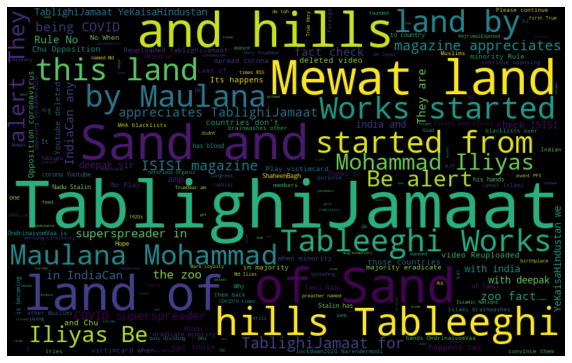

In [86]:
all_words = ' '.join([text for text in tweet_df['text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [87]:
sid = SentimentIntensityAnalyzer()

In [88]:
tweet_df['sentiment']=tweet_df['text'].apply(lambda x: sid.polarity_scores(x))


In [57]:
!pip install TextBlob

In [89]:
from textblob import TextBlob
tweet_df['polarity_score']=tweet_df['text'].apply(lambda text:TextBlob(text).sentiment.polarity )

In [59]:
tweet_df.head(10)

,text,user,location,sentiment,polarity_score
0,#TablighiJamaat #YeKaisaHindustan we are with india and with u deepak sir♥️,JaiMaha43013830,PKMKB,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
1,Thanks to #TablighiJamaat And how can we forget #MigrantWorkers conspiracy too !!#COVID__19,neha_unny,,"{'neg': 0.331, 'neu': 0.506, 'pos': 0.163, 'compound': -0.4559}",0.3125
2,"Ask Self , WHY ? You know but you will Not Answer 🦠🤣🤪😂😎 #TablighiJamaat in 28-29 th…",Proud_Patel,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
3,#TablighiJamaat #YeKaisaHindustan we are with india and with u deepak sir♥️,Vipulso52260888,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
4,"#Mewat is the birthplace of the #TablighiJamaat was founded in the 1920s by a preacher named Md Ilias,“The dominance o…",SainiPolitics,"New York, USA","{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.2023}",0.0000
5,"#Mewat is the birthplace of the #TablighiJamaat was founded in the 1920s by a preacher named Md Ilias,“The dominanc…",RaviTewariHindu,"Kolkata, India","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
6,"See the image. My purpose was to show Ashok sir, that if u are so mu…",BvigilantCTzen,India,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
7,"Hum ""Aah"" bhi kar de toh ho jate h badnaam Woh ""Qataal"" bhi kar de toh cha…",SyedF_official,"Kolkata, India","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
8,#TablighiJamaat #YeKaisaHindustan we are with india and with u deepak sir♥️,Minayadav11,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
9,#TablighiJamaat #YeKaisaHindustan we are with india and with u deepak sir♥️,Sushant96092005,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000


In [95]:
tweet_df['polarity']=tweet_df['polarity_score'].apply(lambda x:'positive' if x>0 else'negative')

In [96]:
tweet_df['label']=tweet_df['polarity'].apply(lambda x:1 if x=="positive" else -1)

In [97]:
tweet_df

,text,user,location,sentiment,polarity_score,polarity,label
0,#TablighiJamaat #YeKaisaHindustan we are with india and with u deepak sir♥️,JaiMaha43013830,PKMKB,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,negative,-1
1,Thanks to #TablighiJamaat And how can we forget #MigrantWorkers conspiracy too !!#COVID__19,neha_unny,,"{'neg': 0.331, 'neu': 0.506, 'pos': 0.163, 'compound': -0.4559}",0.3125,positive,1
2,"Ask Self , WHY ? You know but you will Not Answer 🦠🤣🤪😂😎 #TablighiJamaat in 28-29 th…",Proud_Patel,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,negative,-1
3,#TablighiJamaat #YeKaisaHindustan we are with india and with u deepak sir♥️,Vipulso52260888,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,negative,-1
4,"#Mewat is the birthplace of the #TablighiJamaat was founded in the 1920s by a preacher named Md Ilias,“The dominance o…",SainiPolitics,"New York, USA","{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.2023}",0.0000,negative,-1
...,...,...,...,...,...,...,...
95,"Mewat a land of Sand and hills.Tableeghi Works started from this land by Maulana Mohammad Iliyas R.A..Be alert, They are…",ShariqAKhan2,,"{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'compound': 0.296}",0.0000,negative,-1
96,"BadCrow asked: ""Why are you sitting on tree spreading wings""?GoodCrow replied: ""I'm blocking hot sun from hunter s…",Prabodhin,Bharatham,"{'neg': 0.133, 'neu': 0.867, 'pos': 0.0, 'compound': -0.3818}",0.2500,positive,1
97,"Mewat a land of Sand and hills.Tableeghi Works started from this land by Maulana Mohammad Iliyas R.A..Be alert, They are…",zakarya58925881,India,"{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'compound': 0.296}",0.0000,negative,-1
98,"Mewat a land of Sand and hills.Tableeghi Works started from this land by Maulana Mohammad Iliyas R.A..Be alert, They a…",shamimbandwi,Mumbai,"{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'compound': 0.296}",0.0000,negative,-1


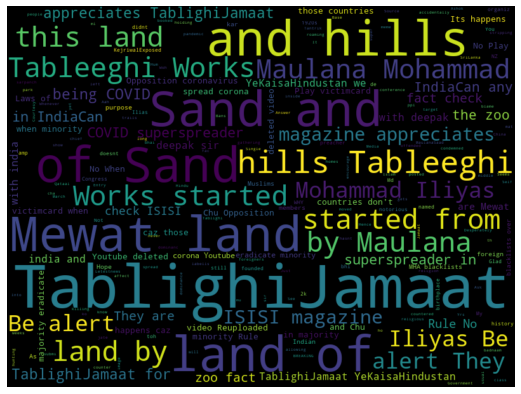

In [102]:
#negative words

neg_words =' '.join([text for text in tweet_df['text'][tweet_df['label'] == -1]])

wordcloud = WordCloud(width=800, height=600, random_state=21, max_font_size=110).generate(neg_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

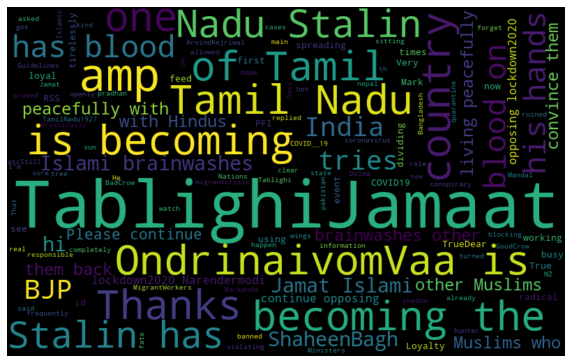

In [64]:
#positive words

pos_words =' '.join([text for text in tweet_df['text'][tweet_df['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pos_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

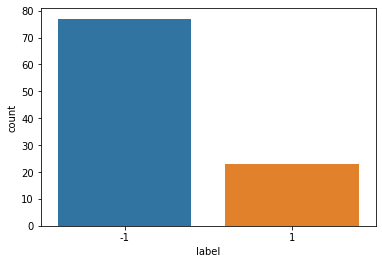

In [104]:
sns.countplot(x='label',data=tweet_df)

In [67]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [105]:
HT_regular = hashtag_extract(tweet_df['text'][tweet_df['label'] == 1])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(tweet_df['text'][tweet_df['label'] == -1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

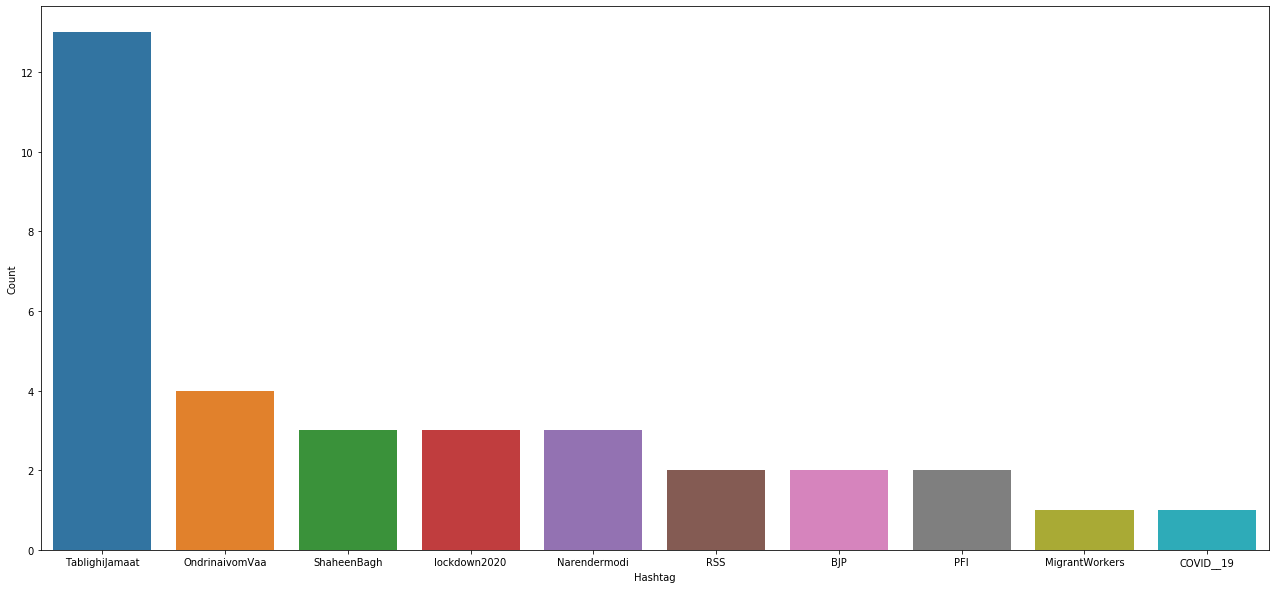

In [106]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(22,10))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

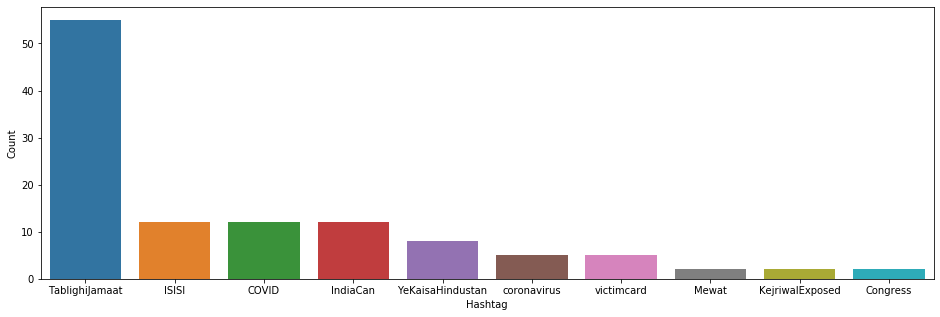

In [107]:
#negative hastags
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()